In [1]:
import random 
import numpy as np
import time
import networkx as nx
import matplotlib.pyplot as plt
import pylab

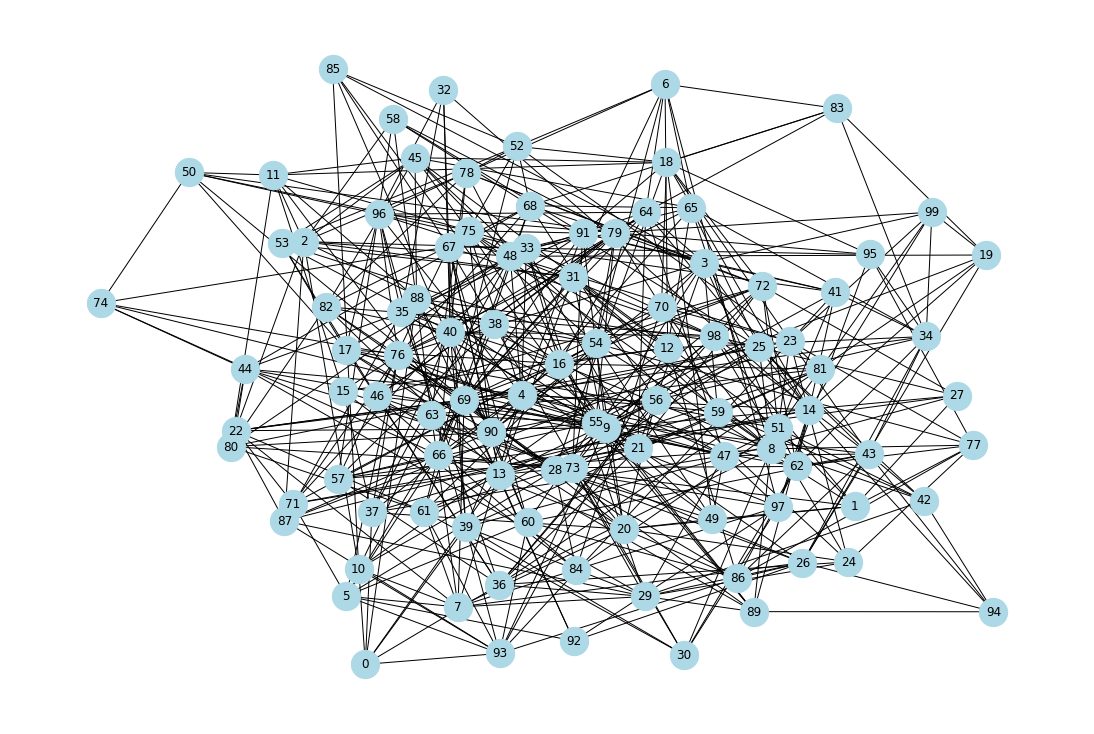

In [2]:
graph=nx.generators.random_graphs.gnm_random_graph(100, 500, 25)

for (u, v) in graph.edges():
    graph.edges[u,v]['weight'] = random.randint(0, 100)
plt.figure(figsize=(15, 10))    
nx.draw(graph, node_color='lightblue', node_size=800,  with_labels=True)

plt.savefig('fig_1.png', dpi=300)

In [3]:
adjacency_matrix=nx.to_numpy_matrix(graph)
adjacency_matrix[:5]

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          58.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,  69.,  42.,   0.,  86.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,   0.,
           0.,   0.,   0.,  51.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          79.,   0.,   0.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0., 

In [4]:
node_1, node_2 = random.randint(0, 99), random.randint(0, 99)

print(' Node 1 -', node_1, '\n', 'Node 2 -', node_2)

 Node 1 - 36 
 Node 2 - 35


In [5]:
summ_time = 0

for i in range(10):
    start_time = time.time()
    path_length = nx.dijkstra_path_length(graph, node_1, node_2)
    time_required = time.time() - start_time
    print('Time required', '{:0.6f}'.format(time_required))
    summ_time += time_required

print()
print('Mean time:', '{:0.6f}'.format(summ_time / 10))
print('Path length:', path_length)
print('Path:', nx.dijkstra_path(graph, node_1, node_2))

Time required 0.000242
Time required 0.000181
Time required 0.000172
Time required 0.000210
Time required 0.000172
Time required 0.000162
Time required 0.000202
Time required 0.000190
Time required 0.000178
Time required 0.000173

Mean time: 0.000188
Path length: 31
Path: [36, 98, 40, 82, 35]


In [6]:
summ_time = 0

for i in range(10):
    start_time = time.time()
    path_length, path = nx.single_source_bellman_ford(graph, node_1, node_2)
    time_required = time.time() - start_time
    print('Time required:', '{:0.6f}'.format(time_required))
    summ_time += time_required

print()    
print('Mean time:', '{:0.6f}'.format(summ_time / 10))
print('Path length:', path_length)
print('Path:', path)

Time required: 0.001199
Time required: 0.001169
Time required: 0.001163
Time required: 0.001059
Time required: 0.001048
Time required: 0.001295
Time required: 0.001286
Time required: 0.001070
Time required: 0.001348
Time required: 0.001342

Mean time: 0.001198
Path length: 31
Path: [36, 98, 40, 82, 35]


In [7]:
grid_size_y = 10
grid_size_x = 20
obstacles_num = 40

In [8]:
G = nx.grid_2d_graph(grid_size_y, grid_size_x)

In [9]:
removed = 0
while removed < obstacles_num:
    y = random.randint(0, grid_size_y - 1)
    x = random.randint(0, grid_size_x - 1)
    if (y, x) not in G:
        continue
    G.remove_node((y, x))
    removed += 1

In [10]:
a, b = random.choice(list(G.nodes.keys())), random.choice(list(G.nodes.keys()))
a, b

((6, 11), (1, 18))

In [11]:
path = nx.astar_path(G, a, b)
print(path)

[(6, 11), (5, 11), (4, 11), (3, 11), (2, 11), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18)]


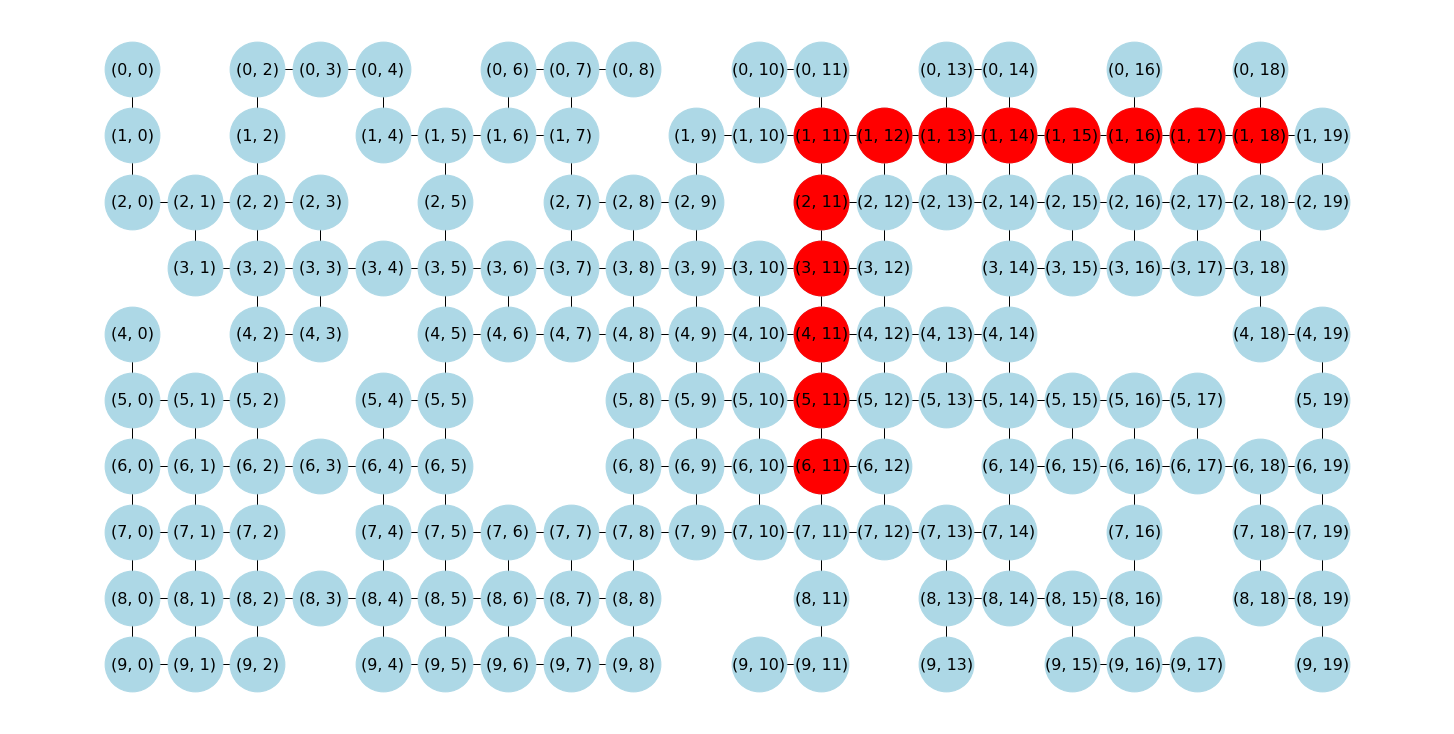

In [12]:
plt.figure(figsize=(20, 10))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(G, pos=pos, node_color='lightblue', with_labels=True, node_size=3000, font_size=16)
nx.draw(G, pos=pos, nodelist=path,node_size=3000,  node_color='red')
plt.savefig('fig_2.png', dpi=300)

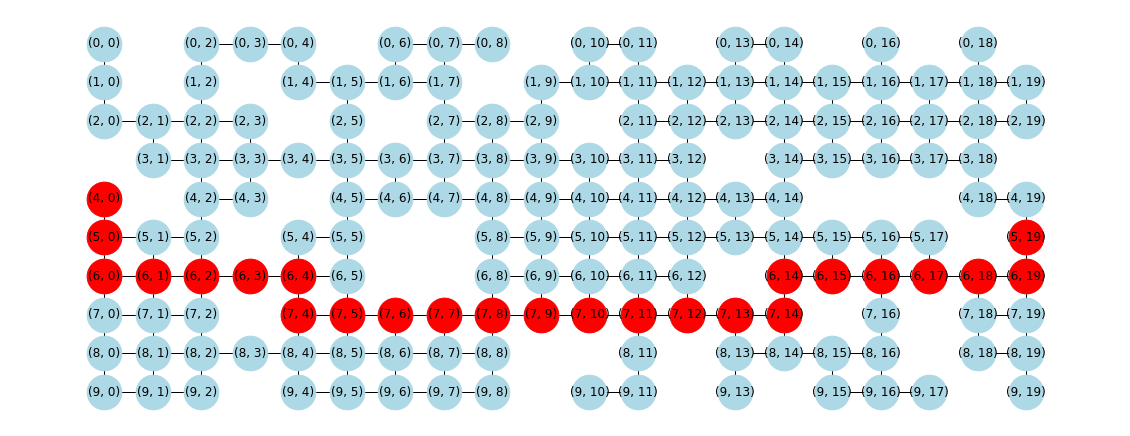

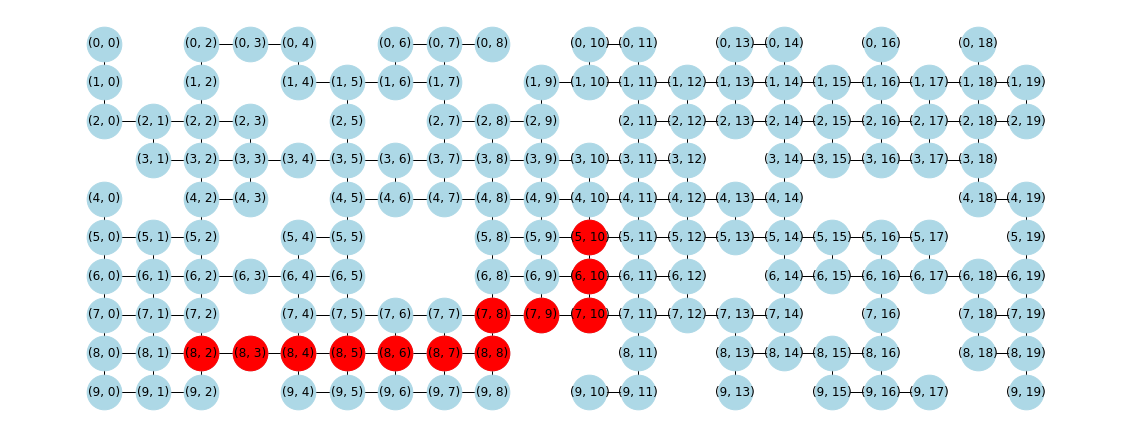

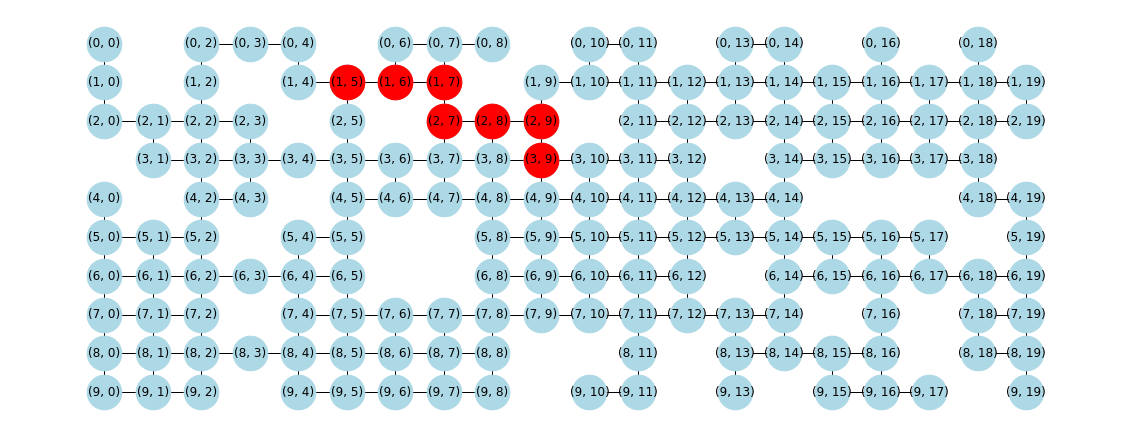

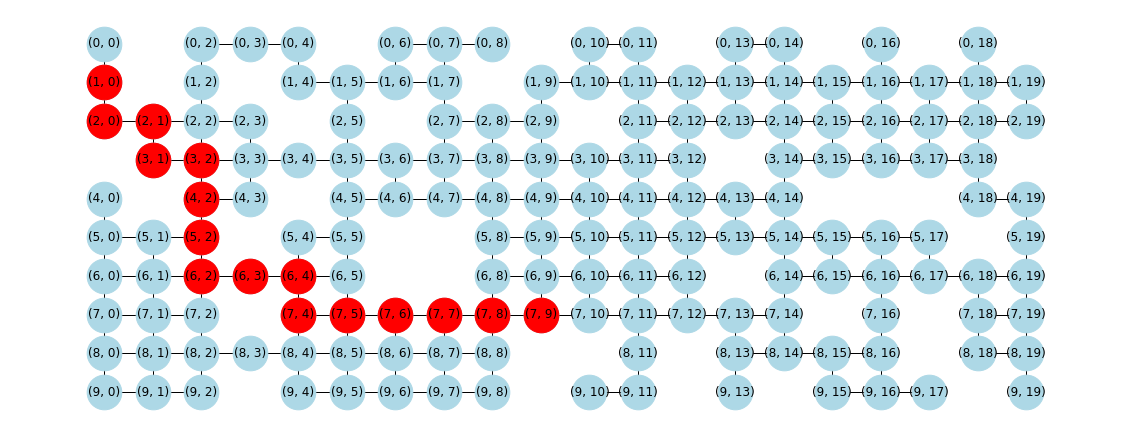

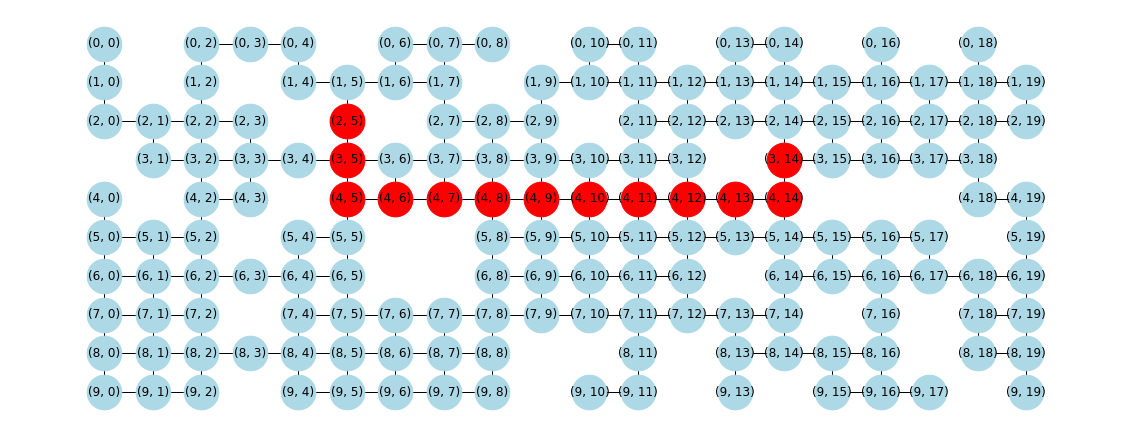

In [13]:
for i in range(1, 6):
    a = random.choice(list(G.nodes.keys()))
    b = random.choice(list(G.nodes.keys()))
    
    path = nx.astar_path(G, a, b)
    plt.figure(figsize=(20, 45))
    pylab.subplot(5, 1, i)
    
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    nx.draw(G, pos=pos, node_color='lightblue', with_labels=True, node_size=1200, font_size=12)
    nx.draw(G, pos=pos, nodelist=path, node_size=1200,  node_color='red')